In [1]:
import pandas as pd
import csv
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

# Read in initial CSV
# If anyone is curious the data is of adverse food events reported to Center for Food Safety and Applied Nutrition

food = pd.read_csv('adverse_food.csv')

# The .head() method returns a sampling of a quantity of records of your choosing in this case I entered 3.

food.head(3)

# The first red flag I see in the data is the first two results are identical. I will filter for identical results

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"


In [2]:
# First let's get a count of the results so we can see as we drop records where we're at with the data

len(food)

90786

In [3]:
#Now we'll use .drop_duplicates() to filter out the duplicate results and save it into a new variable. This .drop_duplicates 
#takes a column name as an argument and will filter out any duplicate results within that column. In this example we're 
#filtering the column 'RA_Report #'

no_dupes = food.drop_duplicates(['RA_Report #'])

#Then I'll display a sampling to illustrate the duplicate results have been removed

no_dupes.head(10)

# The next thing I'd like to remove is all the NaN entries in the data (Stands for 'Not a Number.') These unknowns can cause
# Problems with your data and oft the safest way to deal with them is to remove them

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
6,65350,1/1/2004,NaN,Suspect,GRAPE,20,Fruit/Fruit Prod,NaN,Not Available,Not Available,DEATH,"DEATH, CHOKING"
7,65353,1/2/2004,12/1/2003,Suspect,HERBALIFE RELAX NOW,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
9,65354,1/2/2004,NaN,Suspect,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Male,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,BLOOD PRESSURE INCREASED
10,65355,1/2/2004,10/27/2003,Suspect,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"RASH, FLUSHING, MALAISE, FAECES PALE, VOMITING..."
11,65356,1/2/2004,10/27/2003,Suspect,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,NaN,Not Available,Not Available,NON-SERIOUS INJURIES/ ILLNESS,"LOOSE STOOLS, ABDOMINAL PAIN UPPER, VOMITING, ..."


In [4]:
# Now we'll count the data again to see how many duplicates we just filtered. 90k-65k = 25k duplicates (approximates)
# Hopefully this illustrates the importance of cleaning your data. We're talking about 30% of the dataset that just got filtered

len(no_dupes)

64517

In [5]:
# On to removing the NaN entries from the data. This is common enough Pandas provides the .dropna() method which will
# automatically drop any NA or NaN entries

clean = no_dupes.dropna()

# And another sampling to see what it looks like minus those entries.

clean.head(10)

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH"
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE"
18,65403,1/5/2004,3/4/2003,Suspect,METABOLIFE METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),54.0,Year(s),Female,"LIFE THREATENING, HOSPITALIZATION",CEREBROVASCULAR ACCIDENT
20,65416,1/6/2004,11/15/2003,Suspect,AVLIMIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,Year(s),Female,VISITED A HEALTH CARE PROVIDER,"HEART RATE INCREASED, DIZZINESS, BLOOD PRESSUR..."
22,65420,1/6/2004,11/1/2003,Suspect,COFFEE,31,Coffee/Tea,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
32,65421,1/6/2004,8/21/2003,Suspect,DIET COKE,29,Soft Drink/Water,14.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,ALOPECIA
35,65422,1/6/2004,5/24/2003,Suspect,FLEXIUM SAM-E,54,Vit/Min/Prot/Unconv Diet(Human/Animal),59.0,Year(s),Female,VISITED A HEALTH CARE PROVIDER,"PHYSICAL EXAMINATION, ARTHRALGIA, ALOPECIA, DE..."


In [6]:
# Then another count. This time we went from roughly 65k entries to 22k. Dropping 43k entries. From the original 90k we have
# now dropped about 75% of the original entries filtering for just two issues. Our data is much cleaner.

len(clean)

21762

In [7]:
# This last one has more to do with readability than the integrity of the data but another trick I thought I'd share. The entry
# with the index # 3 has the value "Not Available" in the Cl_Gender column. If you want to replace a value with another you
# can use the method below where I will be replacing it with "Unknown." 

cleaner = clean.replace('Not Available', 'Unknown')

#Then another illustration to highlight that it worked.

cleaner.head(10)

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Unknown,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH"
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE"
18,65403,1/5/2004,3/4/2003,Suspect,METABOLIFE METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),54.0,Year(s),Female,"LIFE THREATENING, HOSPITALIZATION",CEREBROVASCULAR ACCIDENT
20,65416,1/6/2004,11/15/2003,Suspect,AVLIMIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,Year(s),Female,VISITED A HEALTH CARE PROVIDER,"HEART RATE INCREASED, DIZZINESS, BLOOD PRESSUR..."
22,65420,1/6/2004,11/1/2003,Suspect,COFFEE,31,Coffee/Tea,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
32,65421,1/6/2004,8/21/2003,Suspect,DIET COKE,29,Soft Drink/Water,14.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,ALOPECIA
35,65422,1/6/2004,5/24/2003,Suspect,FLEXIUM SAM-E,54,Vit/Min/Prot/Unconv Diet(Human/Animal),59.0,Year(s),Female,VISITED A HEALTH CARE PROVIDER,"PHYSICAL EXAMINATION, ARTHRALGIA, ALOPECIA, DE..."


In [8]:
# Another count to prove no entries were removed this time, just edited

len(cleaner)

21762

In [9]:
cleaner['Age_Year'] = cleaner['CI_Age at Adverse Event']
month_filter = cleaner['CI_Age Unit'] == 'Month(s)'
cleaner.loc[month_filter, 'Age_Year'] = cleaner.loc[month_filter, 'Age_Year'] / 12

cleaner

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Age_Year
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",2.00
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Unknown,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",0.25
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,10.00
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH",51.00
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE",45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90773,214397,6/28/2017,4/19/2017,Concomitant,BIOTIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),24.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),"BURNING SENSATION, URTICARIA, CHEMICAL INJURY,...",24.00
90775,214407,6/28/2017,3/10/2017,Concomitant,CENTRUM SILVER,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,Year(s),Female,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",92.00
90779,214478,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,5.00
90780,214479,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,2.00


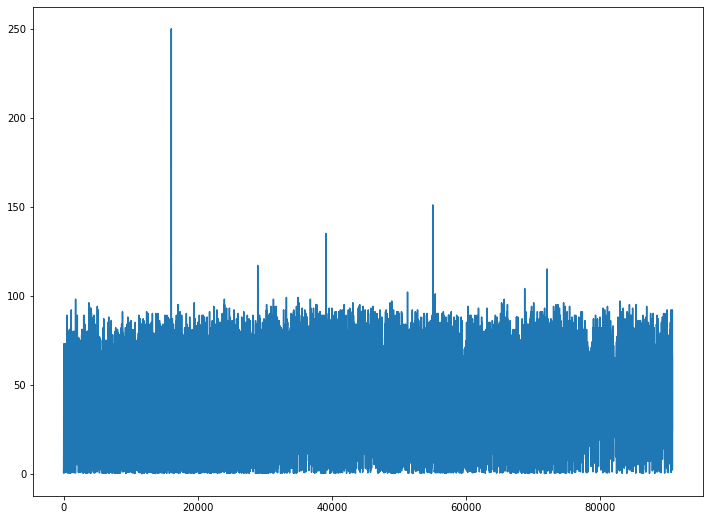

In [10]:
graph = plt.figure(figsize=[12, 9])

ax = graph.add_subplot(1, 1, 1)

ax.plot(cleaner['Age_Year'])

In [11]:
cleaner['AEC_One Row Outcomes'][:10]

0     VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...
3                         NON-SERIOUS INJURIES/ ILLNESS
5                         NON-SERIOUS INJURIES/ ILLNESS
16                                                DEATH
17                                                DEATH
18                    LIFE THREATENING, HOSPITALIZATION
20                       VISITED A HEALTH CARE PROVIDER
22                         LIFE THREATENING, DISABILITY
32                        NON-SERIOUS INJURIES/ ILLNESS
35                       VISITED A HEALTH CARE PROVIDER
Name: AEC_One Row Outcomes, dtype: object

In [12]:
cleaner.describe()

,RA_Report #,PRI_FDA Industry Code,CI_Age at Adverse Event,Age_Year
count,21762.00000,21762.000000,21762.000000,21762.000000
mean,156287.20375,42.548065,43.831266,43.458188
std,39468.72621,16.803574,23.317932,23.355765
min,65325.00000,2.000000,0.000000,0.000000
25%,126733.25000,29.000000,27.000000,27.000000
50%,167389.00000,54.000000,45.000000,45.000000
75%,189265.75000,54.000000,61.000000,61.000000
max,214516.00000,54.000000,736.000000,250.000000


In [13]:
bins = [0, 21, 40, 65, np.inf]

names = ['<21', '21-40', '40-65', '65+']

cleaner['Age_Range'] = pd.cut(cleaner['Age_Year'], bins, labels=names)

cleaner['Age_Range']

0          <21
3          <21
5          <21
16       40-65
17       40-65
         ...  
90773    21-40
90775      65+
90779      <21
90780      <21
90781      65+
Name: Age_Range, Length: 21762, dtype: category
Categories (4, object): [<21 < 21-40 < 40-65 < 65+]

In [14]:
db = sqlite3.connect("Adverse_Food.db")

cleaner.to_sql("Adverse_Food", db, if_exists="replace")

query = 'SELECT * FROM Adverse_Food;'

results = pd.read_sql_query(query, db)

results

C:\Users\bourb\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,index,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Age_Year,Age_Range
0,0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",2.00,<21
1,3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Unknown,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",0.25,<21
2,5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,10.00,<21
3,16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH",51.00,40-65
4,17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE",45.00,40-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21757,90773,214397,6/28/2017,4/19/2017,Concomitant,BIOTIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),24.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),"BURNING SENSATION, URTICARIA, CHEMICAL INJURY,...",24.00,21-40
21758,90775,214407,6/28/2017,3/10/2017,Concomitant,CENTRUM SILVER,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,Year(s),Female,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",92.00,65+
21759,90779,214478,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,5.00,<21
21760,90780,214479,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,2.00,<21


In [15]:
db.execute('DELETE FROM Adverse_Food WHERE Age_Year > 100;')

db.commit()

result = pd.read_sql_query(query, db)

result

,index,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Age_Year,Age_Range
0,0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",2.00,<21
1,3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Unknown,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",0.25,<21
2,5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,10.00,<21
3,16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH",51.00,40-65
4,17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE",45.00,40-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21748,90773,214397,6/28/2017,4/19/2017,Concomitant,BIOTIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),24.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),"BURNING SENSATION, URTICARIA, CHEMICAL INJURY,...",24.00,21-40
21749,90775,214407,6/28/2017,3/10/2017,Concomitant,CENTRUM SILVER,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,Year(s),Female,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",92.00,65+
21750,90779,214478,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,5.00,<21
21751,90780,214479,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION,2.00,<21


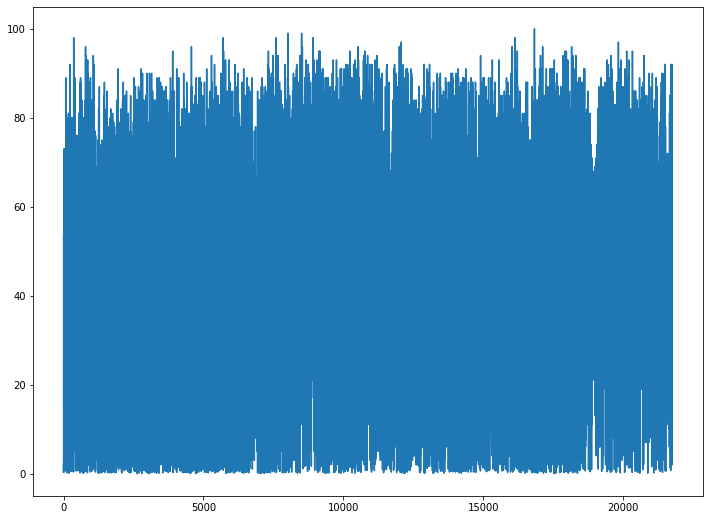

In [16]:
graph1 = plt.figure(figsize=[12, 9])

ax1 = graph1.add_subplot(1, 1, 1)

ax1.plot(result['Age_Year'])

In [17]:
db.execute("DROP TABLE IF EXISTS ADVERSE_AGE_RANGE;")

db.execute('''
         CREATE TABLE IF NOT EXISTS ADVERSE_AGE_RANGE
         (GENDER TEXT NOT NULL,
         AGE_RANGE TEXT);''')

db.execute("""INSERT INTO ADVERSE_AGE_RANGE (GENDER, AGE_RANGE) 
            SELECT CI_Gender, Age_Range FROM Adverse_Food
            """)

db.execute("""DELETE FROM ADVERSE_AGE_RANGE WHERE GENDER = 'Not Reported'""")

db.commit()

yo = "SELECT *, COUNT (*) AS NUMBER_IN_RANGE FROM ADVERSE_AGE_RANGE GROUP BY AGE_RANGE;"

hey = pd.read_sql_query(yo, db)

hey

,GENDER,AGE_RANGE,NUMBER_IN_RANGE
0,Male,None,8
1,Female,21-40,5238
2,Male,40-65,8290
3,Male,65+,4001
4,Female,<21,4215


In [18]:
query = "SELECT AGE_RANGE, COUNT (*) AS NUMBER_IN_RANGE FROM ADVERSE_AGE_RANGE GROUP BY AGE_RANGE;"

by_age = pd.read_sql_query(query, db)

by_age

,AGE_RANGE,NUMBER_IN_RANGE
0,None,8
1,21-40,5238
2,40-65,8290
3,65+,4001
4,<21,4215


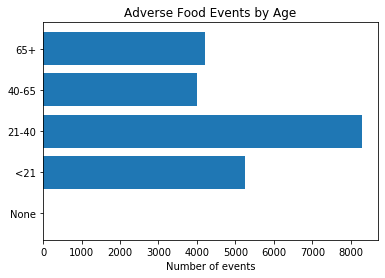

In [19]:
plt.barh(width=by_age['NUMBER_IN_RANGE'], y=['None', '<21', '21-40', '40-65', '65+'])
plt.xlabel('Number of events')
plt.title('Adverse Food Events by Age')
plt.show()

In [20]:
query1 = "SELECT AGE_RANGE, GENDER, COUNT (*) AS NUMBER_IN_RANGE FROM ADVERSE_AGE_RANGE GROUP BY AGE_RANGE, GENDER;"

by_gender = pd.read_sql_query(query1, db)

by_gender

,AGE_RANGE,GENDER,NUMBER_IN_RANGE
0,None,Female,4
1,None,Male,4
2,21-40,Female,3333
3,21-40,Male,1798
4,21-40,Unknown,107
5,40-65,Female,5708
6,40-65,Male,2452
7,40-65,Unknown,130
8,65+,Female,2592
9,65+,Male,1360


In [21]:
query2 = "SELECT AGE_RANGE, GENDER, COUNT (*) AS NUMBER_IN_RANGE FROM ADVERSE_AGE_RANGE WHERE GENDER = 'Male' GROUP BY AGE_RANGE;"

male = pd.read_sql_query(query2, db)

male

,AGE_RANGE,GENDER,NUMBER_IN_RANGE
0,None,Male,4
1,21-40,Male,1798
2,40-65,Male,2452
3,65+,Male,1360
4,<21,Male,2001


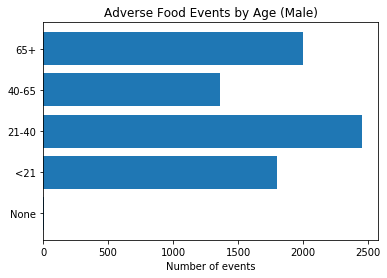

In [22]:
plt.barh(width=male['NUMBER_IN_RANGE'], y=['None', '<21', '21-40', '40-65', '65+'])
plt.xlabel('Number of events')
plt.title('Adverse Food Events by Age (Male)')
plt.show()

In [23]:
query3 = "SELECT AGE_RANGE, GENDER, COUNT (*) AS NUMBER_IN_RANGE FROM ADVERSE_AGE_RANGE WHERE GENDER = 'Female' GROUP BY AGE_RANGE;"

female = pd.read_sql_query(query3, db)

female

,AGE_RANGE,GENDER,NUMBER_IN_RANGE
0,None,Female,4
1,21-40,Female,3333
2,40-65,Female,5708
3,65+,Female,2592
4,<21,Female,1928


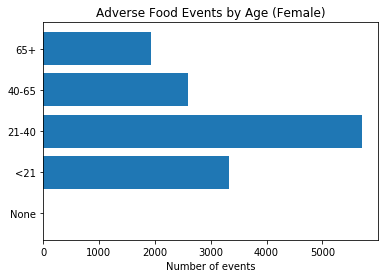

In [24]:
plt.barh(width=female['NUMBER_IN_RANGE'], y=['None', '<21', '21-40', '40-65', '65+'])
plt.xlabel('Number of events')
plt.title('Adverse Food Events by Age (Female)')
plt.show()

In [25]:
query4 = "SELECT GENDER, COUNT (*) AS NUMBER_BY_GENDER FROM ADVERSE_AGE_RANGE GROUP BY GENDER;"

tot_gender = pd.read_sql_query(query4, db)

tot_gender

,GENDER,NUMBER_BY_GENDER
0,Female,13565
1,Male,7615
2,Unknown,572


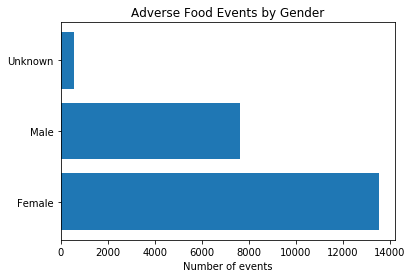

In [26]:
plt.barh(width=tot_gender['NUMBER_BY_GENDER'], y=['Female', 'Male', 'Unknown'])
plt.xlabel('Number of events')
plt.title('Adverse Food Events by Gender')
plt.show()

In [27]:
#db.close()